## *Import Libraries*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

### *Load Dataset*

In [7]:
df = pd.read_csv('C:/Users/amado/Desktop/Vehicules/data/cars.csv')

In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,manufacturer
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,Ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,Ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,Ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,Ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,Ford


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64132 entries, 0 to 64131
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         64132 non-null  object 
 1   year          64132 non-null  int64  
 2   price         64132 non-null  int64  
 3   transmission  64132 non-null  object 
 4   mileage       64132 non-null  int64  
 5   fuelType      64132 non-null  object 
 6   tax           64132 non-null  int64  
 7   mpg           64132 non-null  float64
 8   engineSize    64132 non-null  float64
 9   manufacturer  64132 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.9+ MB


In [13]:
serie_mean_price = df.groupby('manufacturer')['price'].mean().sort_values(ascending = True)

In [14]:
sns.set_style('whitegrid')

## *Which Vehicle Manufacturer has a Higher Average Price?*

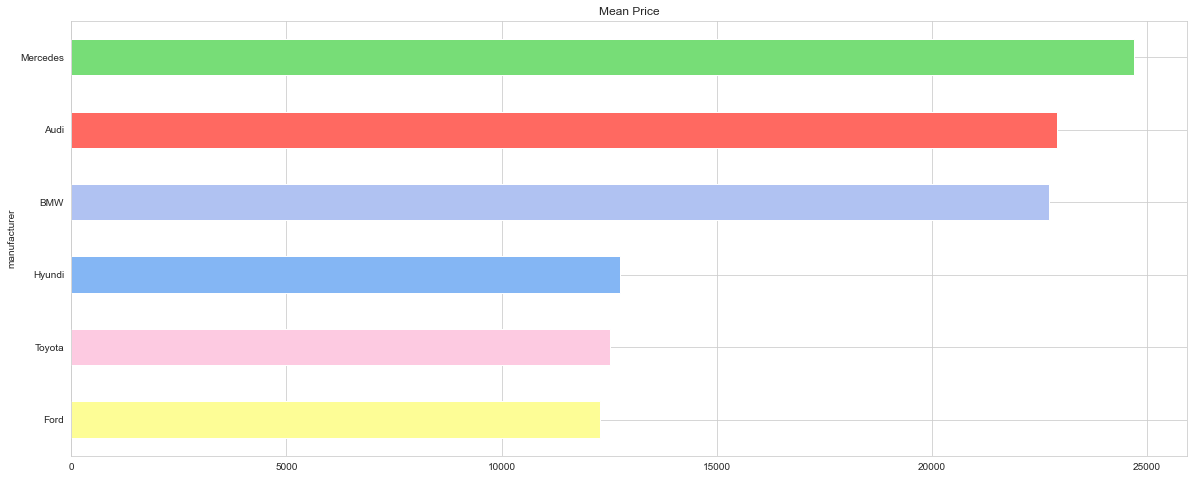

In [23]:
fig = plt.subplots(1,1,figsize = (20,8))
_= serie_mean_price.plot(kind = 'barh',title = 'Mean Price',
                         color = ['#fdfd96','#fdcae1','#84b6f4','#b0c2f2','#ff6961','#77dd77'])

Mercedes Benz for this dataset is the vehicle manufacturer with a higher average price. It is not surprising since it is a manufacturer of high prestige vehicles just like BMW and Audi.

### *Average of Each Vehicle According to the Manufacturer*

In [51]:
ford = df.query("manufacturer == 'Ford'")
toyota = df.query("manufacturer == 'Toyota'")
hyundi = df.query("manufacturer == 'Hyundi'")

In [52]:
audi = df.query("manufacturer == 'Audi'")
bmw = df.query("manufacturer == 'BMW'")
mercedes = df.query("manufacturer == 'Mercedes'")

In [60]:
def Barplot(subset):
    serie = subset.groupby('model')['price'].mean().sort_values(ascending = True)
    fig = plt.subplots(1,1,figsize = (20,8))
    serie.plot(kind = 'barh',color = ['#fdfd96','#fdcae1','#84b6f4','#b0c2f2','#ff6961','#77dd77'])

#### *Ford*

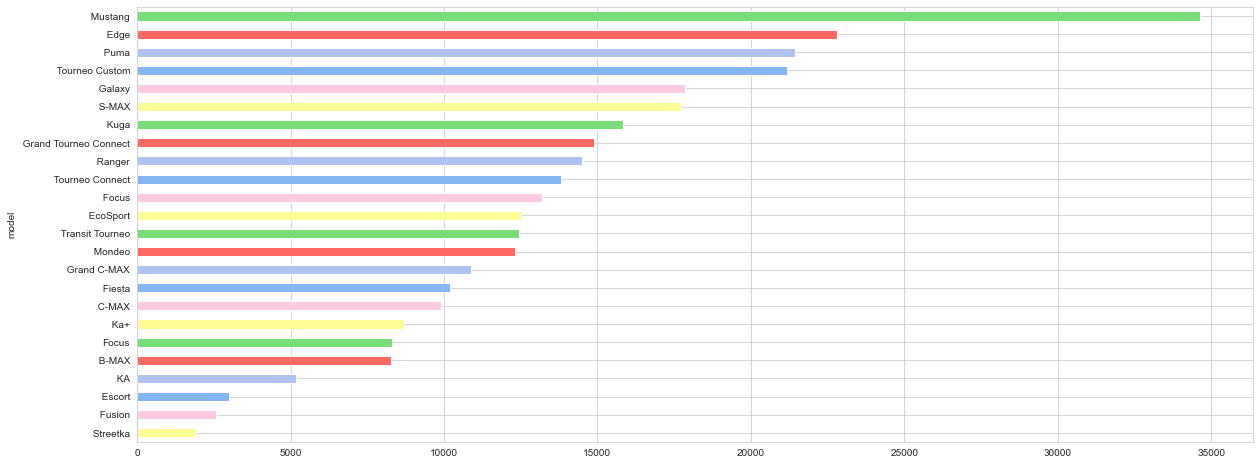

In [61]:
_ = Barplot(ford)

#### *Toyota*

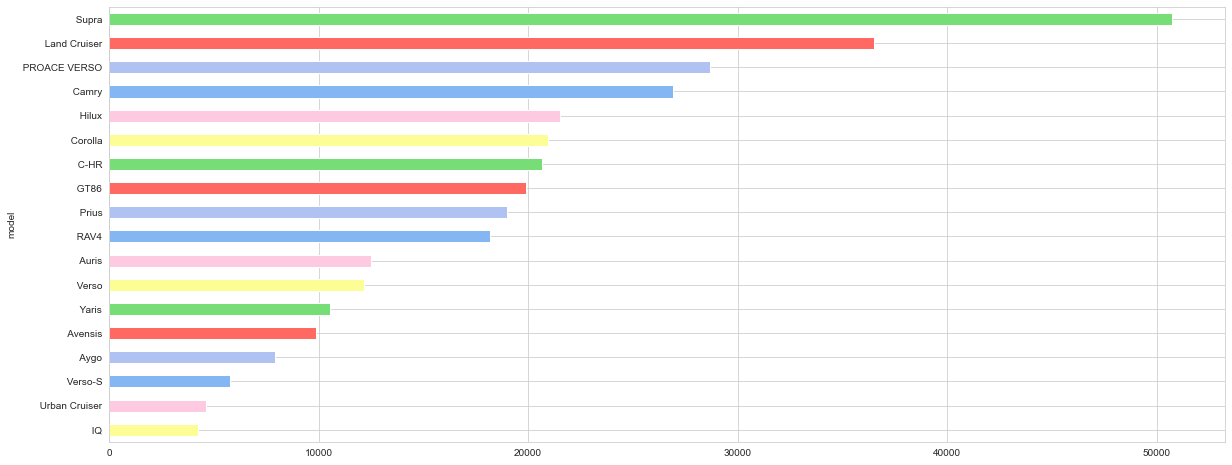

In [62]:
_ = Barplot(toyota)

#### *Hyundi*

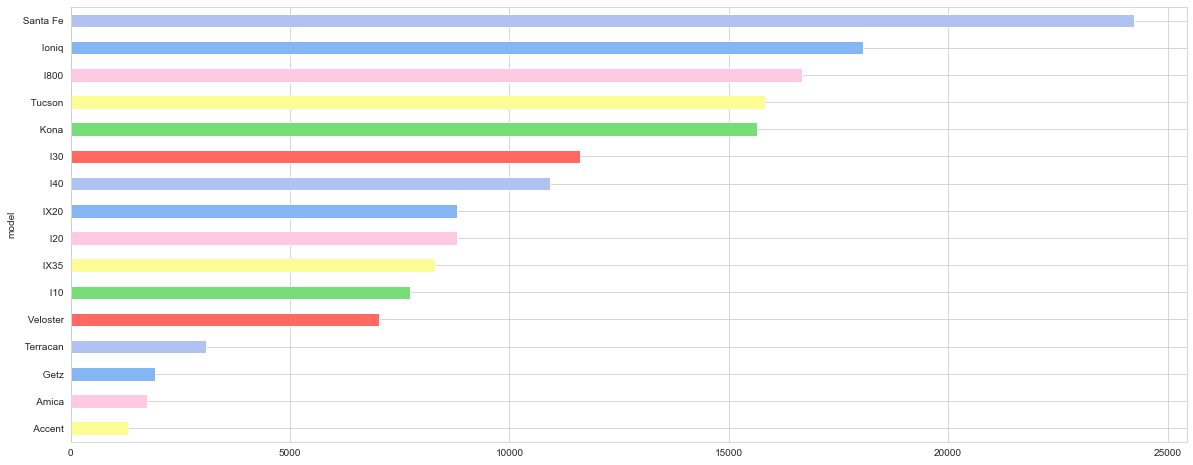

In [63]:
_ = Barplot(hyundi)

#### *Audi*

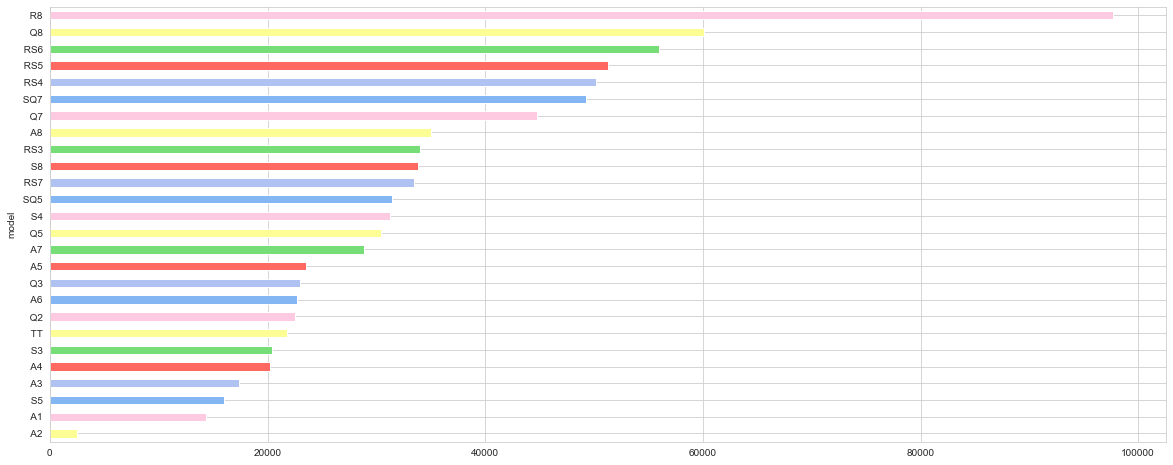

In [64]:
_ = Barplot(audi)

#### *BMW*

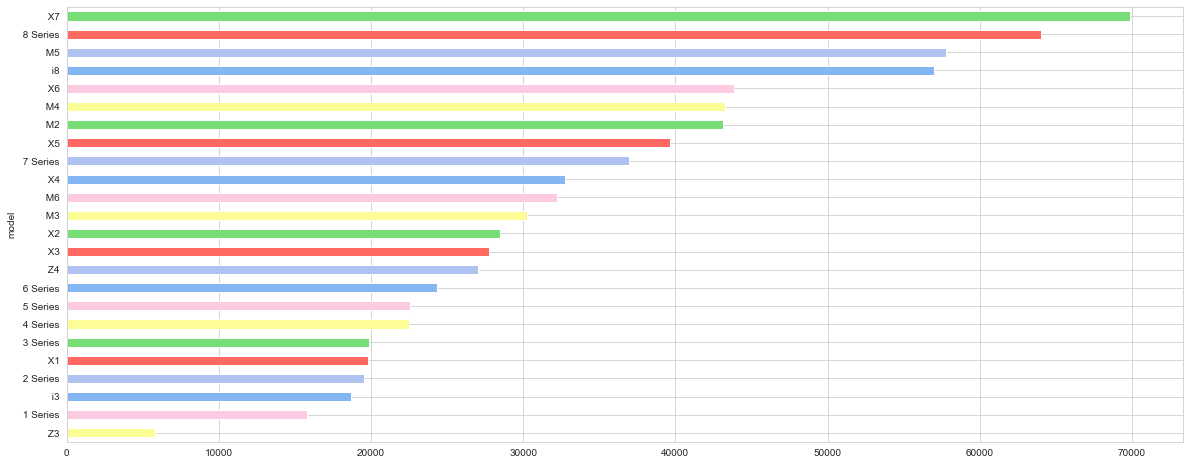

In [65]:
_ = Barplot(bmw)

#### *Mercedes Venz*

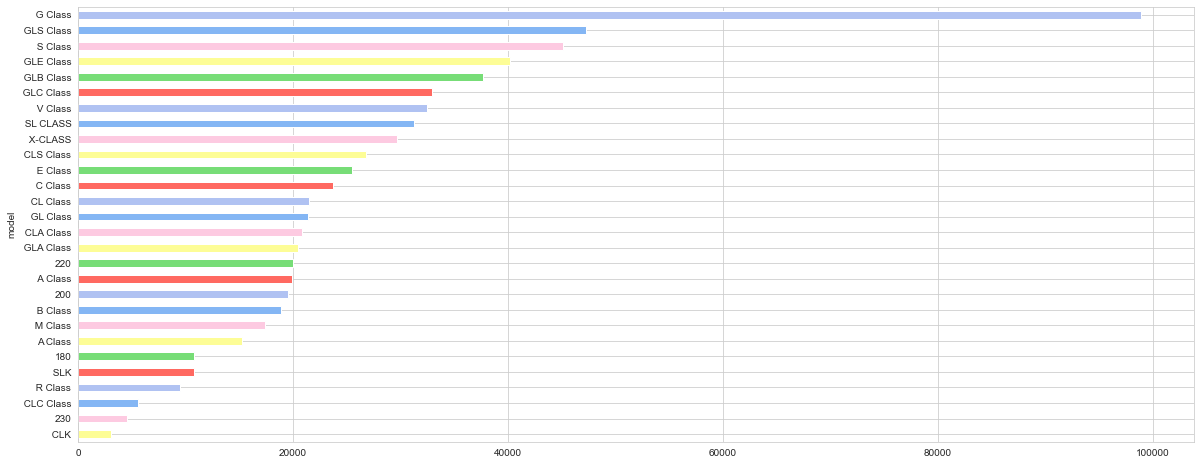

In [66]:
_ = Barplot(mercedes)

### *Average MPG Based on Engine Size*

In [74]:
engine_size_serie = df.groupby('engineSize')['mpg'].mean().sort_values(ascending = True)

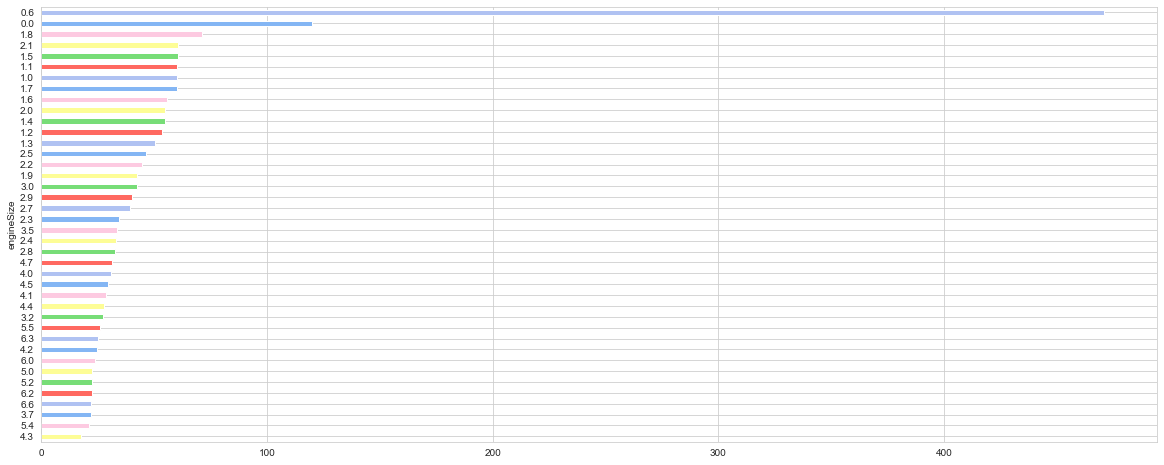

In [81]:
fig = plt.subplots(1,1,figsize = (20,8))
_ = engine_size_serie.plot(kind = 'barh',
                           color = ['#fdfd96','#fdcae1','#84b6f4',
                                     '#b0c2f2','#ff6961','#77dd77'])

Generally vehicles with a smaller Engine Size have a better MPG consumption.Because the engine has more power.

### *Matrix Correlation Plot*

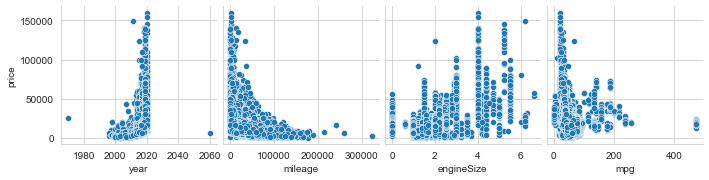

In [84]:
_ = sns.pairplot(data = df,x_vars = ['year','mileage','engineSize','mpg'],y_vars = ['price'])

* **Year**: It has a high relationship with the price. Since generally a newer model will be more expensive.




* **Mileage**: A vehicle with more miles decreases the price of the vehicle. Since more wear will be generated.




* **Engine Size**: Generally luxury vehicles have a more powerful engine than low-end vehicles.


* **MPG**: With a lower Engine Size the MPG is higher. But at the same time it indicates that the engine is less powerful. Since most moderately priced vehicles have high MPG.

A clear outlier is presented for the Year variable. Since there are no vehicles that have a manufacturing date of the year 2060. Perhaps it is a failure to collect the data.

## *Histogram*

In [89]:
def Histogram(x):
    
    fig,ax = plt.subplots(1,1,figsize = (20,8))
    ax.set_title(x)
    sns.histplot(data = df,x = x,color = 'c',ax = ax,kde = True)

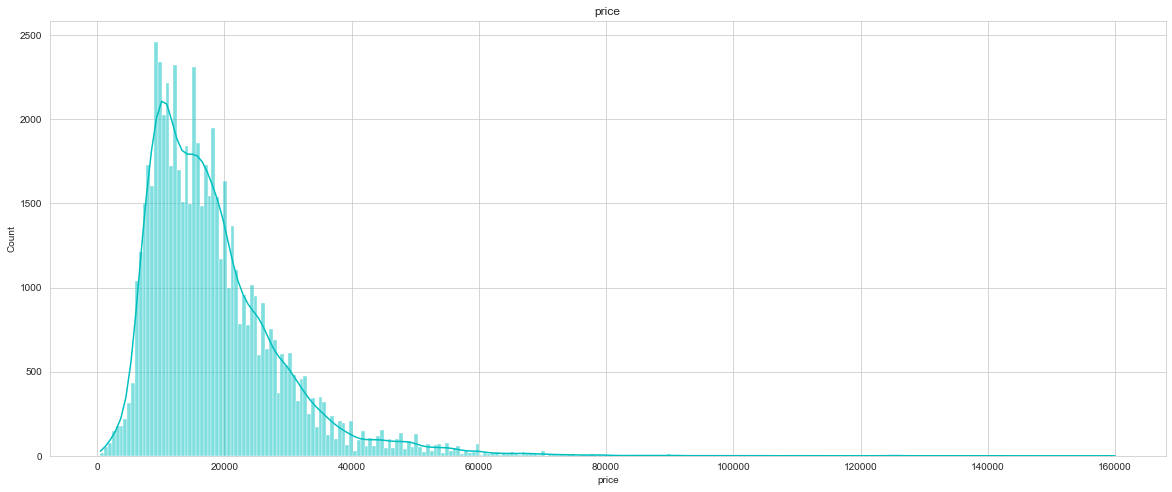

In [92]:
_ = Histogram('price')

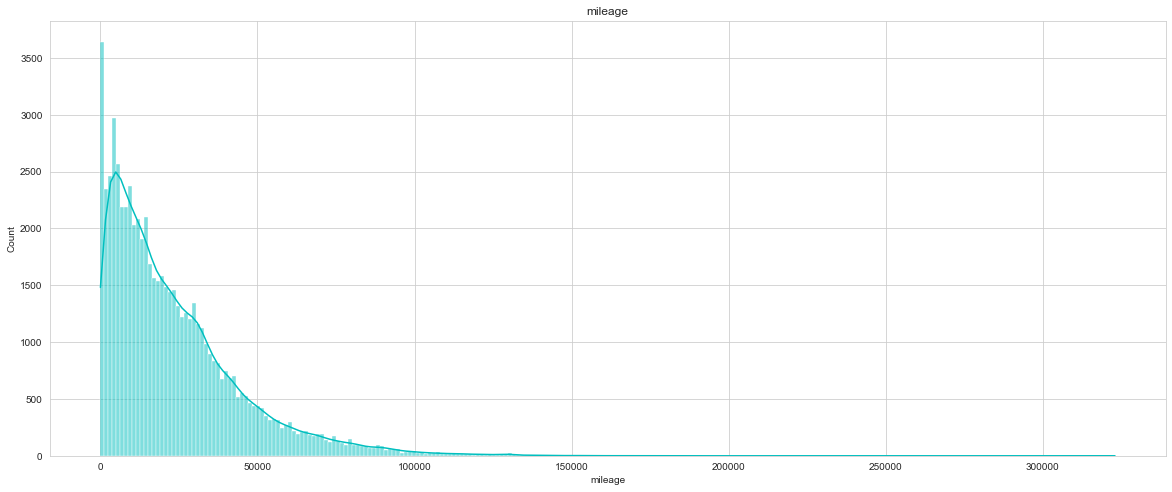

In [93]:
_ = Histogram('mileage')

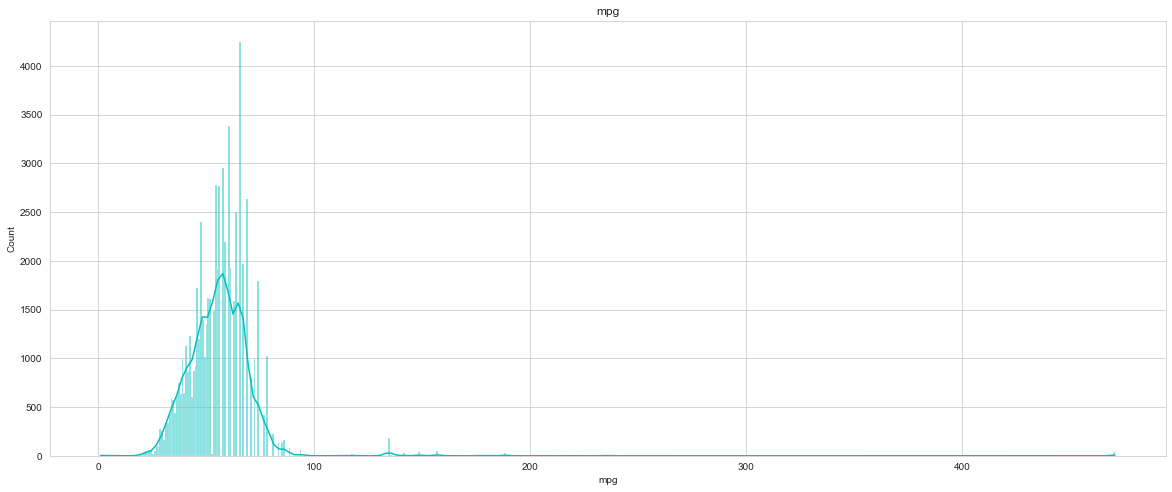

In [95]:
_ = Histogram('mpg')

In each histogram it is presented with several abnormal values. So you have to investigate them and see if they have a logical explanation.

If they lack such an explanation we could create a confidence interval. From this interval we select the values that are in a normal distribution.

## *Pie Plot*

In [120]:
def PiePlot(feature):
    serie = df[feature].value_counts()
    fig = plt.subplots(1,1,figsize = (22,8))
    serie.plot(kind = 'pie',colors = ['#fdfd96','#fdcae1',
                                      '#84b6f4','#b0c2f2',
                                      '#ff6961','#77dd77'],
               autopct=lambda p:'{:.2f}%({:.0f})'.format(p,(p/100)*serie.sum()))
    
    plt.ylabel(None)

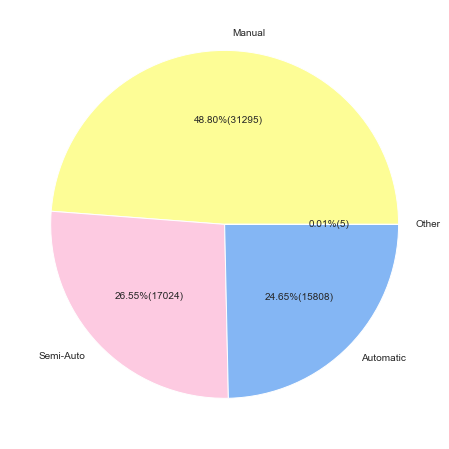

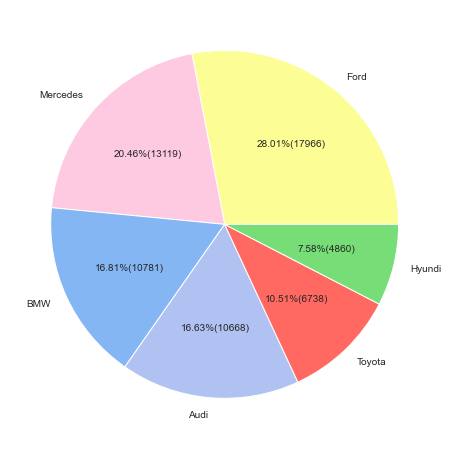

In [122]:
for column in ['transmission','manufacturer']:
    
    _ = PiePlot(column)